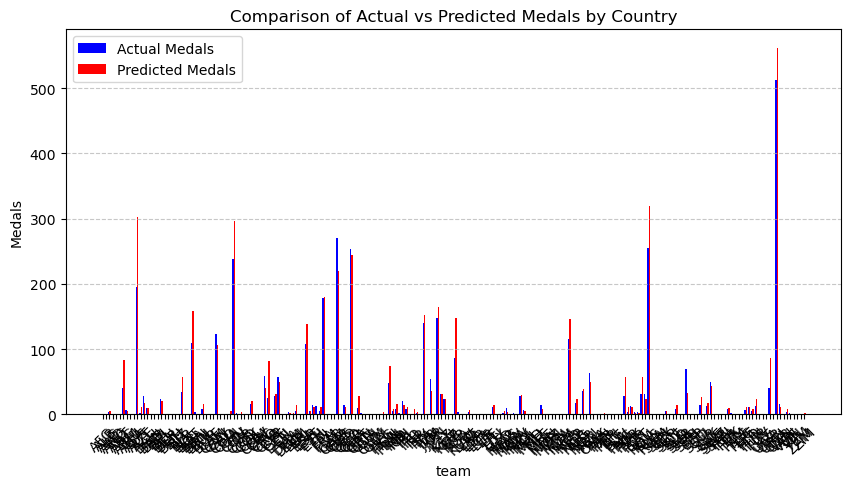

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

#Loading the csv file with data about countries and medals won in previous and current years and athlete details
file=pd.read_csv(r"C:\Users\user\Desktop\Jupyter\teams.csv")
#print(file)
#This is to find the correlation, between other column with medal column which we want to predict. Highly correlated varaibles will be used for the linear regression analysis
file_excluded = file.select_dtypes(exclude='object')
corr=file_excluded.corr()["medals"]

#cleaning data to remove empty cell rows from the loaded CSV file
file=file.dropna()

#Seggregating data based on year less than 2012 and more than 2012. Less than 2012 will be used for training the model and more than 2012 shall be used for predicting
newfile_test=file[file["year"]<2012].copy()
newfile_predict=file[file["year"]>=2012].copy()

#The most highly correlated column with Medal column for creating linear regression line
X_test1=["athletes", "prev_medals", "prev_3_medals"]
#This column is what we want to predict
Y_test=["medals"]

#plot linear regression on test data
model=LinearRegression()
model.fit(newfile_test[X_test1],newfile_test[Y_test])

#predicting medals column value from predection file from Linear regression plotted on test data
predictions=model.predict(newfile_predict[X_test1])

#Adding a new Medalpredictions column in the prediction data set with the predicted medal values
newfile_predict["Medalpredictions"]=predictions

#If prediction is -ve then update as 0 as a country cant have -ve medals
newfile_predict.loc[newfile_predict["Medalpredictions"]<0,"Medalpredictions"]=0

#Incase of decimal values round off
newfile_predict["Medalpredictions"]=newfile_predict["Medalpredictions"].round()

#Export to excel
newfile_predict.to_excel("output3.xlsx", index=False)

# Group data by country and sum the medals and predictions
df_grouped = newfile_predict.groupby("team", as_index=False).sum()

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(df_grouped["team"]))  # Get positions for bars

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, df_grouped["medals"], width=bar_width, color='blue', label="Actual Medals")
plt.bar(x + bar_width/2, df_grouped["Medalpredictions"], width=bar_width, color='red', label="Predicted Medals")

# Labels and Title
plt.xlabel("team")
plt.ylabel("Medals")
plt.title("Comparison of Actual vs Predicted Medals by Country")
plt.xticks(ticks=x, labels=df_grouped["team"], rotation=45)  # Rotate country names for better visibility
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()

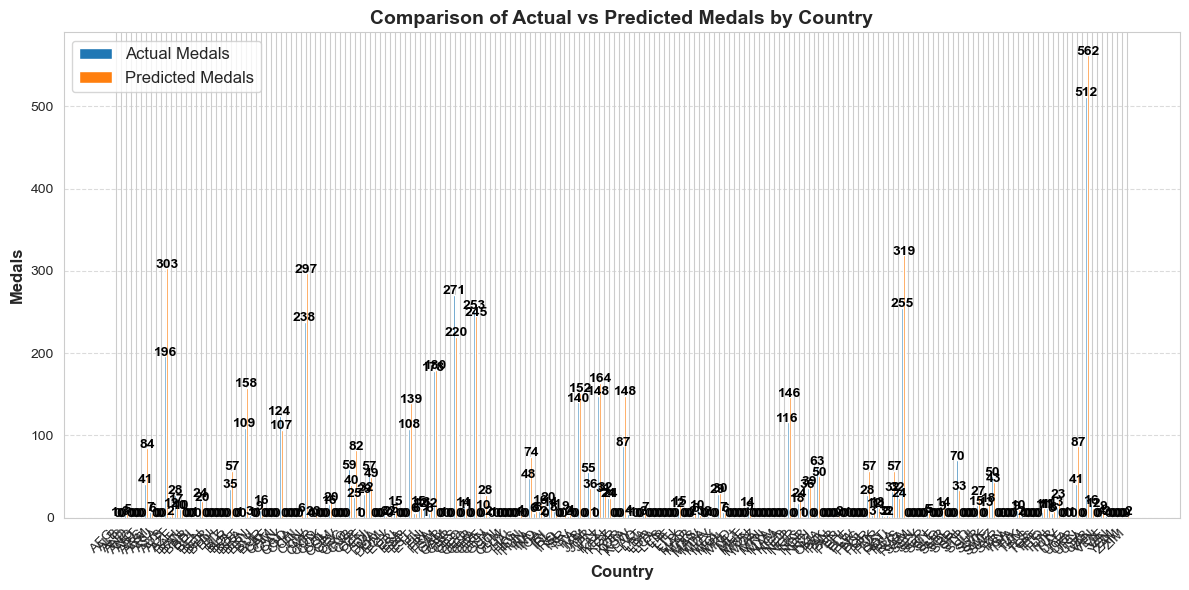

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Load CSV file containing data about countries, medals won in previous years, and athlete details
file = pd.read_csv(r"C:\Users\user\Desktop\Jupyter\teams.csv")

# Drop missing values to ensure data consistency
file = file.dropna()

# Select only numerical columns for correlation analysis
file_excluded = file.select_dtypes(exclude='object')
corr = file_excluded.corr()["medals"]

# Segregate data for training (<2012) and prediction (>=2012)
train_data = file[file["year"] < 2012].copy()
predict_data = file[file["year"] >= 2012].copy()

# Select features highly correlated with 'medals' for regression
features = ["athletes", "prev_medals", "prev_3_medals"]
target = ["medals"]

# Train a Linear Regression model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Predict medal counts for years >= 2012
predictions = model.predict(predict_data[features])

# Store predictions in the dataset
predict_data["Medalpredictions"] = np.maximum(0, np.round(predictions))  # Ensure non-negative values

# Export results to Excel
predict_data.to_excel("output3.xlsx", index=False)

# Group data by country and sum up the actual and predicted medals
df_grouped = predict_data.groupby("team", as_index=False).sum()

# Set up bar width and positions for side-by-side bars
bar_width = 0.4
x = np.arange(len(df_grouped["team"]))

# Create a visually appealing bar chart
plt.figure(figsize=(12, 6))

# Plot actual medals
plt.bar(x - bar_width / 2, df_grouped["medals"], width=bar_width, color="#1f77b4", label="Actual Medals")

# Plot predicted medals
plt.bar(x + bar_width / 2, df_grouped["Medalpredictions"], width=bar_width, color="#ff7f0e", label="Predicted Medals")

# Add labels and formatting
plt.xlabel("Country", fontsize=12, fontweight="bold")
plt.ylabel("Medals", fontsize=12, fontweight="bold")
plt.title("Comparison of Actual vs Predicted Medals by Country", fontsize=14, fontweight="bold")
plt.xticks(ticks=x, labels=df_grouped["team"], rotation=45, ha="right")  # Rotate country names for better readability
plt.legend(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Add value labels on top of bars
for i, val in enumerate(df_grouped["medals"]):
    plt.text(x[i] - bar_width / 2, val + 0.5, str(int(val)), ha='center', fontsize=10, fontweight="bold", color="black")

for i, val in enumerate(df_grouped["Medalpredictions"]):
    plt.text(x[i] + bar_width / 2, val + 0.5, str(int(val)), ha='center', fontsize=10, fontweight="bold", color="black")

# Show the plot
plt.tight_layout()
plt.show()

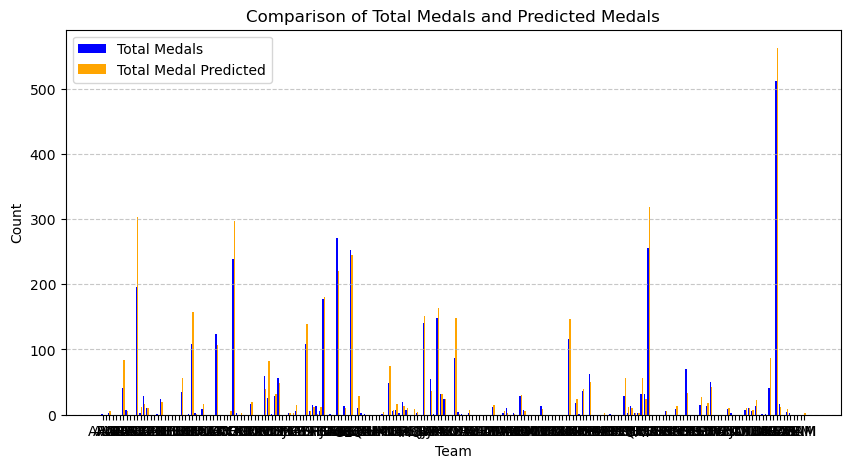

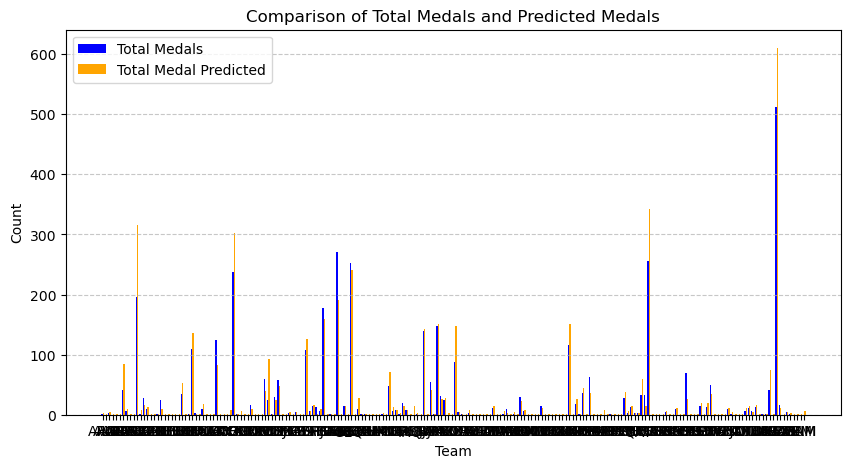

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

#Loading the csv file with data about countries and medals won in previous and current years and athlete details
file=pd.read_csv(r"C:\Users\user\Desktop\Jupyter\teams.csv")
#print(file)
#This is to find the correlation, between other column with medal column which we want to predict. Highly correlated varaibles will be used for the linear regression analysis
file_excluded = file.select_dtypes(exclude='object')
corr=file_excluded.corr()["medals"]

#cleaning data to remove empty cell rows from the loaded CSV file
file=file.dropna()

#Seggregating data based on year less than 2012 and more than 2012. Less than 2012 will be used for training the model and more than 2012 shall be used for predicting
newfile_test=file[file["year"]<2012].copy()
newfile_predict=file[file["year"]>=2012].copy()

#The most highly correlated column with Medal column for creating linear regression line
X_test1=["prev_medals", "prev_3_medals"]
#This column is what we want to predict
Y_test=["medals"]

#plot linear regression on test data
model=LinearRegression()
model.fit(newfile_test[X_test1],newfile_test[Y_test])

#predicting medals column value from predection file from Linear regression plotted on test data
predictions=model.predict(newfile_predict[X_test1])

#Adding a new Medalpredictions column in the prediction data set with the predicted medal values
newfile_predict["Medalpredictions"]=predictions

#If prediction is -ve then update as 0 as a country cant have -ve medals
newfile_predict.loc[newfile_predict["Medalpredictions"]<0,"Medalpredictions"]=0

#Incase of decimal values round off
newfile_predict["Medalpredictions"]=newfile_predict["Medalpredictions"].round()

#Export to excel
newfile_predict.to_excel("output3.xlsx", index=False)

df_grouped = newfile_predict.groupby('team')[['medals', 'Medalpredictions']].sum()

# Bar chart setup
x = np.arange(len(df_grouped))  # X-axis locations for bars
width = 0.4  # Bar width

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, df_grouped['medals'], width, label='Total Medals', color='blue')
ax.bar(x + width/2, df_grouped['Medalpredictions'], width, label='Total Medal Predicted', color='orange')

# Labels & Formatting
ax.set_xlabel("Team")
ax.set_ylabel("Count")
ax.set_title("Comparison of Total Medals and Predicted Medals")
ax.set_xticks(x)
ax.set_xticklabels(df_grouped.index)  # Team names on x-axis
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()